# Airbnb Data Analysis

# 1- Data Understanding
##### The following report is going to discuss the following questions:

1- Which property type is the most popular in Boston and Seattle?

2- Do properties sell higher in Boston or Seattle?

3- Which city has the highest property review ratings?

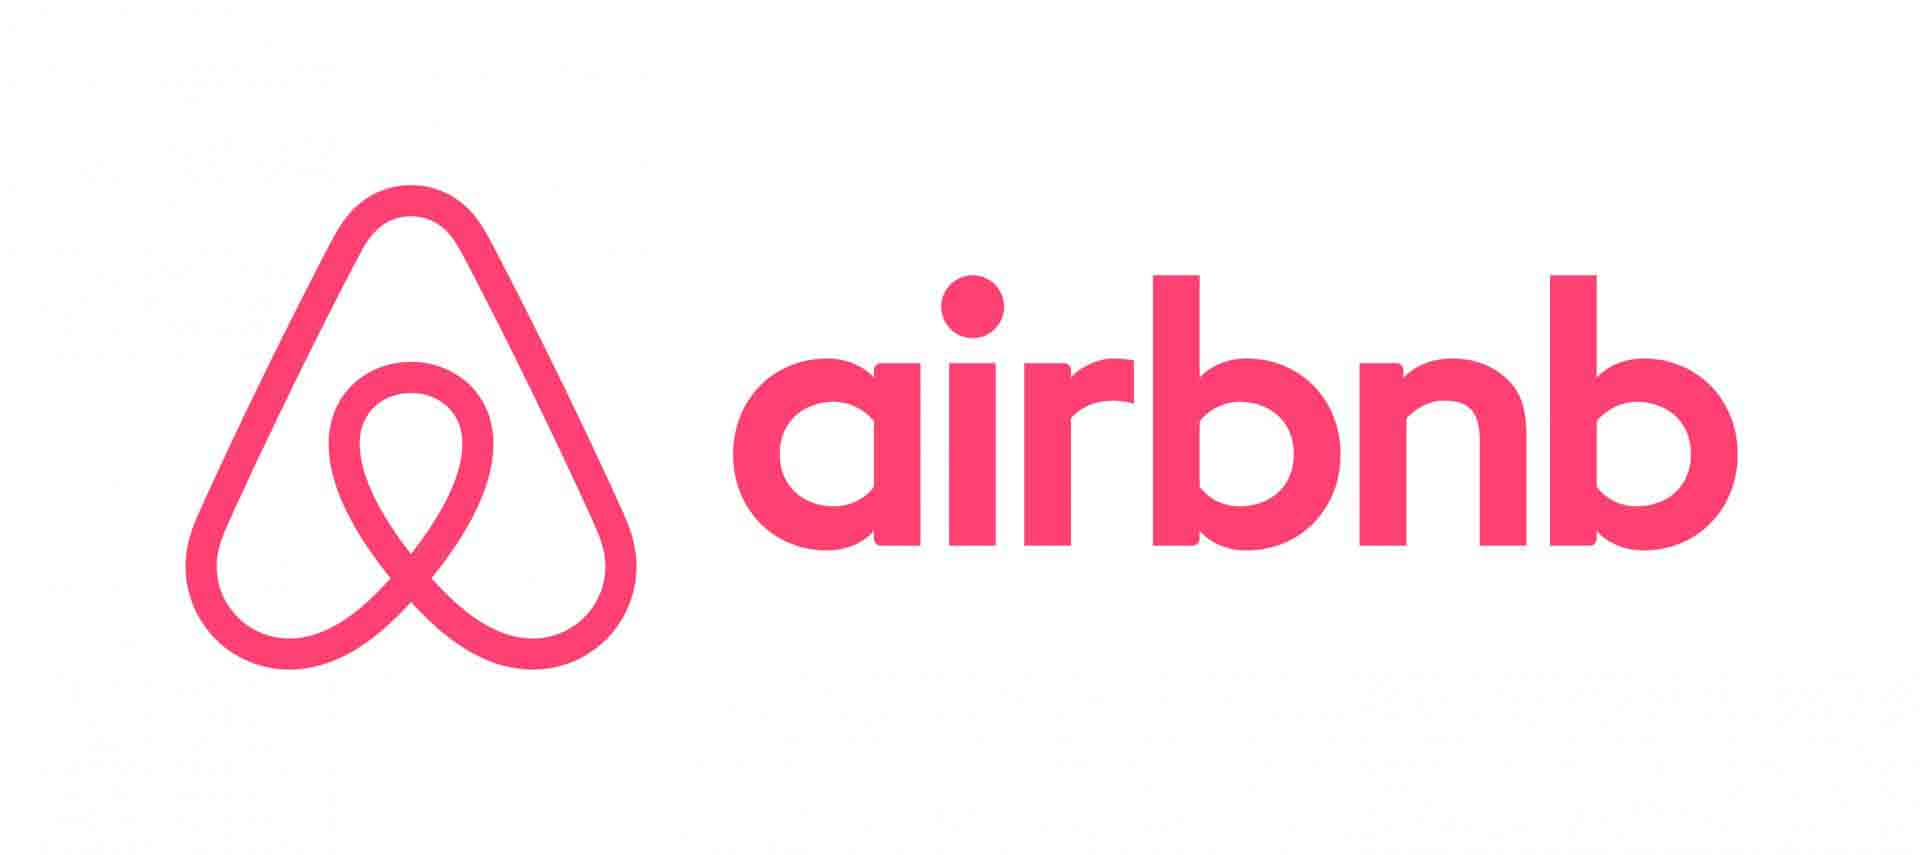

In [194]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import numpy as np
%matplotlib inline
warnings.filterwarnings("ignore")

# 2- Data Preparation

In [195]:
# First we read the data
# Assess

df = pd.read_csv("boston.csv")
df2 = pd.read_csv("seattle.csv")

In [196]:
# We take a look at the data 
# Assess

df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [197]:
df2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


#### The columns we need to have non-null values to anwer the questions are:
#### 1- city
#### 2- property_type
#### 3-price
#### 4- review_scores_rating

In [198]:
# Let's check for missing data for the first dataframe 
# Assess

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

##### As we can see, city has 2 missing values, property type has 3 missing values, review scores rating has 813 missing values
##### This will be solved later

In [199]:
# Let's check for missing data in the second dataframe 
# Assess

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

##### As we can see property type has 1 missing values, review scores ratings has 647 missing values, this will be solved later

#### Now let's describe the data

In [200]:
# Assess

df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [201]:
# Assess

df2.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


# 2- Cleaning Data

We first need to deal with missing data, we drop any rows with the city or property type missing.
That's because it wouldn't make sense for the first question to have the city or the property missing.
For the review ratings, we will fill each city group with it's mean

In [202]:
# We first drop the rows with the city or property type missing 
# Clean

df = df.dropna(subset=["city", "property_type"], axis=0)
df2 = df2.dropna(subset=["city", "property_type"], axis=0)

In [203]:
# Then we fill each city group with it's mean
# Clean


city_groups = df.groupby("city")["review_scores_rating"]
city_groups_2 = df2.groupby("city")["review_scores_rating"]
df["review_scores_rating"] = city_groups.transform(lambda x: x.fillna(x.mean()))
df2["review_scores_rating"] = city_groups_2.transform(lambda x: x.fillna(x.mean()))


# We now drop what is remaining nan
# Note: cities that have nan values after this step means that the city did not get atleast one review in the first place

df = df.dropna(subset=["review_scores_rating"], axis=0)
df2 = df2.dropna(subset=["review_scores_rating"], axis=0)

# Reset index 
df.reset_index(inplace=True)
df2.reset_index(inplace=True)

Now for the prices columns, as you can see it's written as a string and contains ",", "$"
We define a function that will convert it into integer

In [204]:
df["price"].head()

0    $250.00
1     $65.00
2     $65.00
3     $75.00
4     $79.00
Name: price, dtype: object

In [205]:
# We define a function to clean the data
# Clean

def clean_data(col):
    """
    This function will take a price column as a parameter and then convert it into number,
    getting rid of "," and "$" and also converting the datatype
    
    Parameters:
        column
    
    return:
        a cleaned column
    
    """
    
    col2 = col.str.replace("$", "")
    col2 = col2.str.replace(",", "")
    col2 = col2.astype("float64")
    return col2


# We then apply this function to the two dataframes

df["price"] = clean_data(df["price"])
df2["price"] = clean_data(df2["price"])

In [206]:
df["price"].head()

0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

As you can see, the function did the work!

# 3- Answering Questions

# Question 1:  Which property type is the most popular in Boston and Seattle?

#### Let's create 2 dataframes, one which has the city as Boston only, and the other has the city as Seattle only

In [207]:
# Assess

boston_only = df[(df["city"] == "Boston")]
seattle_only = df2[(df2["city"] == "Seattle")]

In [208]:
# We then group them by property type
# Analyze

boston_popular = boston_only.groupby("property_type").count()["id"]
boston_results = pd.DataFrame(boston_popular)
boston_results

,id
property_type,
Apartment,2501
Bed & Breakfast,36
Boat,12
Condominium,224
Dorm,2
Entire Floor,3
Guesthouse,1
House,494
Loft,35


#### As we can clearly see, apartments are the most common in Boston

# Question 2: Do properties sell higher in Boston or Seattle?

In [209]:
# Now we can easly group by the city (Seattle) and get the mean prices
# Analyze

seattle_mean_prices = seattle_only.groupby("city").mean()["price"]


# We do the same thing for Boston

boston_mean_prices = boston_only.groupby("city").mean()["price"]

# We create a dataframe to compare the results

compare_boston_and_seattle = pd.concat([seattle_mean_prices, boston_mean_prices], axis=0)
compare_boston_and_seattle

city
Seattle    128.054345
Boston     176.796921
Name: price, dtype: float64

#### Obviously, properties in Boston usually sell higher than they do in Seattle

# Question 3: Which city has the highest property review ratings?

In [210]:
# In this question we will use the "review_scores_rating" column
# We first make 2 new datafrmaes which consists of only the city name and the review rating of the property
# Analyze

new_boston = df[["city", "review_scores_rating"]]
new_seattle = df2[["city", "review_scores_rating"]]


# We then concat these 2 into a new dataframe

new_df = pd.concat([new_boston, new_seattle], axis=0).reset_index()


# We drop the extra "index" column
new_df.drop("index", inplace=True, axis=1)


# We check if there is any writing mistakes

new_df["city"].unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Brighton', 'Brighton ',
       'Boston ', 'West Roxbury', 'Hyde Park', 'Mattapan', 'Milton',
       'Dorchester', 'dorchester, boston ', 'South Boston', 'Allston',
       'ALLSTON', 'Seattle', 'Ballard, Seattle', 'West Seattle',
       'Seattle ', '西雅图', 'Phinney Ridge Seattle'], dtype=object)

In [211]:
# As expected, there are many writing mistakes such as lower and upper case (Boston, boston), there are also extra white spaces
# We solve this by first changing all into title format
# Then stripping it from the white spaces

# We define a function that does the mentioned

def clean_data_2(col):
    """
    This function takes a column as a paramater and cleans it as it applies the title format and strips the column from
    extra white spaces
    
    Paramerters:
        column
        
    returns:
        A cleaned column with no extra white spaces and with title format
    
    """
    
    
    
    col2 = col.str.title()
    col2 = col2.str.strip()
    return col2
    

new_df["city"] = clean_data_2(new_df["city"])


# We can now group the cities and calculate the average review ratings for each city

new_df.groupby("city").mean().sort_values(by="review_scores_rating", ascending=False)

,review_scores_rating
city,
"Jamaica Plain, Ma",100.000000
"Mission Hill, Boston",99.000000
"Ballard, Seattle",98.000000
West Seattle,97.500000
Boston (Jamaica Plain),97.000000
Jamaica Plain (Boston),97.000000
Charlestown,96.692308
Brookline,96.571429
Jamaica Plain,95.735294


#### As it is clear, Jamaica Plain-Ma has the highest review

# 4- Evaluating the results

#### Visualizing the first question's result

Text(0.5,1,'Property types in Boston')

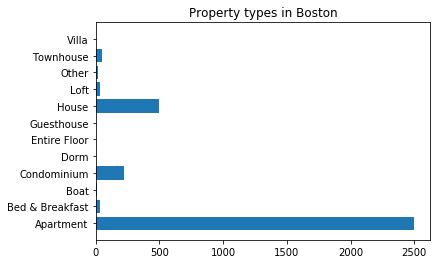

In [212]:
# We plot a bar graph to visualize the first question's result
# Visualize

plt.barh(boston_results.index.tolist(), boston_results["id"])
plt.title("Property types in Boston")

#### We visualize the second question's result

<BarContainer object of 2 artists>

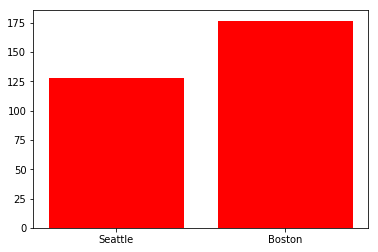

In [215]:
# Visualize

# We concat the 2 dataframes into one dataframe

mean_prices = pd.concat([seattle_mean_prices, boston_mean_prices])


# We finally plot the dataframe to visualize the result

plt.bar(["Seattle", "Boston"], mean_prices, color="Red")

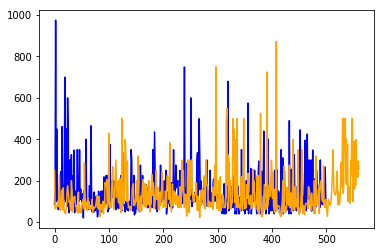

In [145]:
# We additionally visualize part of the prices in both city

seattle_only["price"].head(500).plot(color="Blue")
boston_only["price"].head(500).plot(color="Orange")

#### Visualizing the third question's result

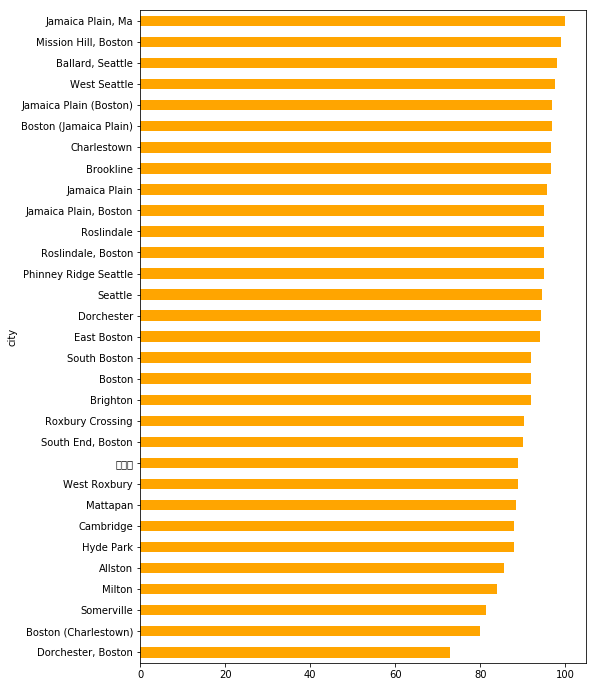

In [216]:
# Visualize

new_df.groupby("city").mean().sort_values(by="review_scores_rating", ascending=True).plot(kind="barh", figsize=(8, 12), legend=False, color="Orange")
